# Mapping Police Violence Case Study

[Mapping Police Violence](https://mappingpoliceviolence.org/) has gathered and cleaned data of police violence across the US.  As we know by now, it is important to understand how the data was collected so please take some time to look over their methodology online.  Our job is to understand trends in the data that naturally come through in the data whilst being careful to be exhaustive in our exploratory data analysis.

In this notebook, we will
1. **Data wrangling:** clean the data,
2. **Data visualization:** inspect trends in the data by applying visualizing techniques such as charts and plots,
3. **Transform the data via normalization:** some of the data may not be well normalized so we will find a good lens from which to understand the data better,
4. **Geographic Visualization:** inspect geographical trends in the data with some functions that create animations,
5. **Summary Statistics:** students will generate summary statistics to find different trends.

First, we import the appropriate libraries.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)
import geopandas as gpd 
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import plotly.express as px # for geographical visuals

# 1. Data Wrangling

To get a better idea of the data, we load an inspect the data.


In [2]:
# Load and inspect data
orig_data = pd.read_csv('MappingPoliceViolence.csv')
data = orig_data.copy(deep=True)
data.head()

,name,age,gender,race,victim_image,date,street_address,city,state,zip,...,congressperson_party,prosecutor_head,prosecutor_race,prosecutor_gender,prosecutor_party,prosecutor_term,prosecutor_in_court,prosecutor_special,independent_investigation,prosecutor_url
0,Rayvon Shahid,17.0,Male,Black,https://cache.legacy.net/legacy/images/cobrand...,11/2/2024,Essex Street and Pasadena Avenue,Flint,MI,48505,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Paul Rolfes,40.0,Male,White,https://d1rjyex4ui0ya6.cloudfront.net/obituari...,11/2/2024,200 N Rodney St.,Helena,MT,59601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sterling Mark Brantley,68.0,Male,Unknown race,NaN,11/1/2024,NaN,San Antonio,TX,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Terry James Lewis Jr.,36.0,Male,Black,https://www.tributearchive.com/_next/image?url...,11/1/2024,I-70 and US 40,Independence,MO,64029,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Name Withheld,NaN,Male,Unknown race,NaN,11/1/2024,1314 Atlas St,Rapid City,SD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.columns

Index(['name', 'age', 'gender', 'race', 'victim_image', 'date',
       'street_address', 'city', 'state', 'zip', 'county',
       'agency_responsible', 'ori', 'cause_of_death', 'circumstances',
       'disposition_official', 'officer_charged', 'news_urls',
       'signs_of_mental_illness', 'allegedly_armed', 'wapo_armed',
       'wapo_threat_level', 'wapo_flee', 'wapo_body_camera', 'wapo_id',
       'off_duty_killing', 'geography', 'fe_id', 'encounter_type',
       'initial_reason', 'officer_names', 'officer_races',
       'officer_known_past_shootings', 'call_for_service', 'tract',
       'urban_rural_uspsai', 'urban_rural_nchs',
       'hhincome_median_census_tract', 'latitude', 'longitude',
       'pop_total_census_tract', 'pop_white_census_tract',
       'pop_black_census_tract', 'pop_native_american_census_tract',
       'pop_asian_census_tract', 'pop_pacific_islander_census_tract',
       'pop_other_multiple_census_tract', 'pop_hispanic_census_tract',
       'congressional_distri

What do you notice about the data?  Please refer to the methodology pdf to understand the variables.  What hypotheses do you expect to see in the data from your initial understanding of police violence and your media sources?

## Wrangling Steps

We want to ensure that it is easy to query the dates of the data well and clean the data to keep the columns with enough data.  We do this in the following steps:

1. Convert the `date` column to datetime format.
2. Add derived columns: `year`, `month`, and `month_year`.
3. Removed columns with more than 90% missing values.

In [4]:
# Data Wrangling Section: Clean the data and prepare for analysis

# TODO: Convert the date column to datetime format
data.date = pd.to_datetime(data.date)

# TODO: Create derived columns for year and month
data['year'] = data.date.dt.year
data['month'] = data.date.dt.month

# TODO: Drop columns with too many missing values (e.g., over 90%), call the cleaned data `data_cleaned`
data_cleaned = data.dropna(thresh=0.9*len(data), axis=1)

In [5]:
# Cleaned Dataset Preview
display(data_cleaned.head())
data_cleaned.columns

,name,age,gender,race,date,street_address,city,state,zip,county,...,pop_total_census_tract,pop_white_census_tract,pop_black_census_tract,pop_native_american_census_tract,pop_asian_census_tract,pop_pacific_islander_census_tract,pop_other_multiple_census_tract,pop_hispanic_census_tract,year,month
0,Rayvon Shahid,17.0,Male,Black,2024-11-02,Essex Street and Pasadena Avenue,Flint,MI,48505,Genesee,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,11
1,Paul Rolfes,40.0,Male,White,2024-11-02,200 N Rodney St.,Helena,MT,59601,Lewis and Clark,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,11
2,Sterling Mark Brantley,68.0,Male,Unknown race,2024-11-01,NaN,San Antonio,TX,NaN,Bandera,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,11
3,Terry James Lewis Jr.,36.0,Male,Black,2024-11-01,I-70 and US 40,Independence,MO,64029,Jackson,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,11
4,Name Withheld,NaN,Male,Unknown race,2024-11-01,1314 Atlas St,Rapid City,SD,NaN,Pennington,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,11


Index(['name', 'age', 'gender', 'race', 'date', 'street_address', 'city',
       'state', 'zip', 'county', 'agency_responsible', 'cause_of_death',
       'circumstances', 'disposition_official', 'news_urls',
       'signs_of_mental_illness', 'allegedly_armed', 'wapo_threat_level',
       'encounter_type', 'initial_reason', 'call_for_service', 'tract',
       'hhincome_median_census_tract', 'latitude', 'longitude',
       'pop_total_census_tract', 'pop_white_census_tract',
       'pop_black_census_tract', 'pop_native_american_census_tract',
       'pop_asian_census_tract', 'pop_pacific_islander_census_tract',
       'pop_other_multiple_census_tract', 'pop_hispanic_census_tract', 'year',
       'month'],
      dtype='object')

Are most of variables of interest to you still in the dataframe after cleaning?  What has changed?

# 2. Data Visualization

We will do a couple of trend analysis methods to actually analyze the police violence trends in different ways.

## Trend Analysis of Police Violence Incidents
The number of incidents of police violence over the years is shown below:

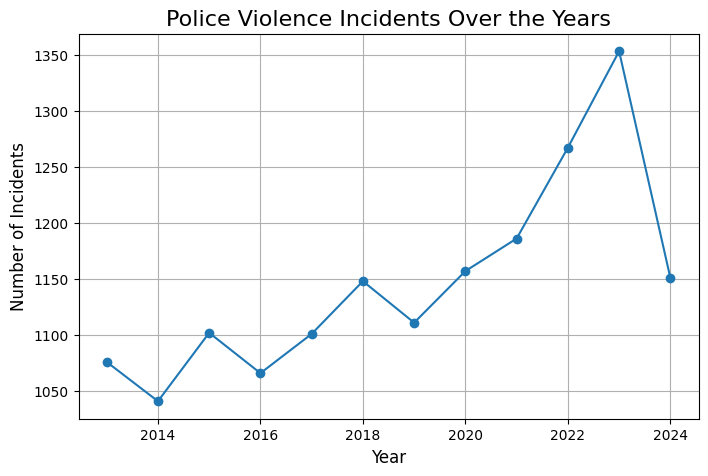

In [6]:
# Aggregating data to visualize trends over time (yearly)
yearly_data = data_cleaned.groupby('year').size()

# Plotting the trend of police violence incidents over years
plt.figure(figsize=(8, 5))
plt.plot(yearly_data.index, yearly_data.values, marker='o')
plt.title('Police Violence Incidents Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.grid(True)
plt.show()

What are some reasons that you see the trend that you see above?  Please discuss the why this would be the case.

## Check number of incidents for each race

Let's plot the number of incidents for each race for each year.  This should give us a sense of the data.

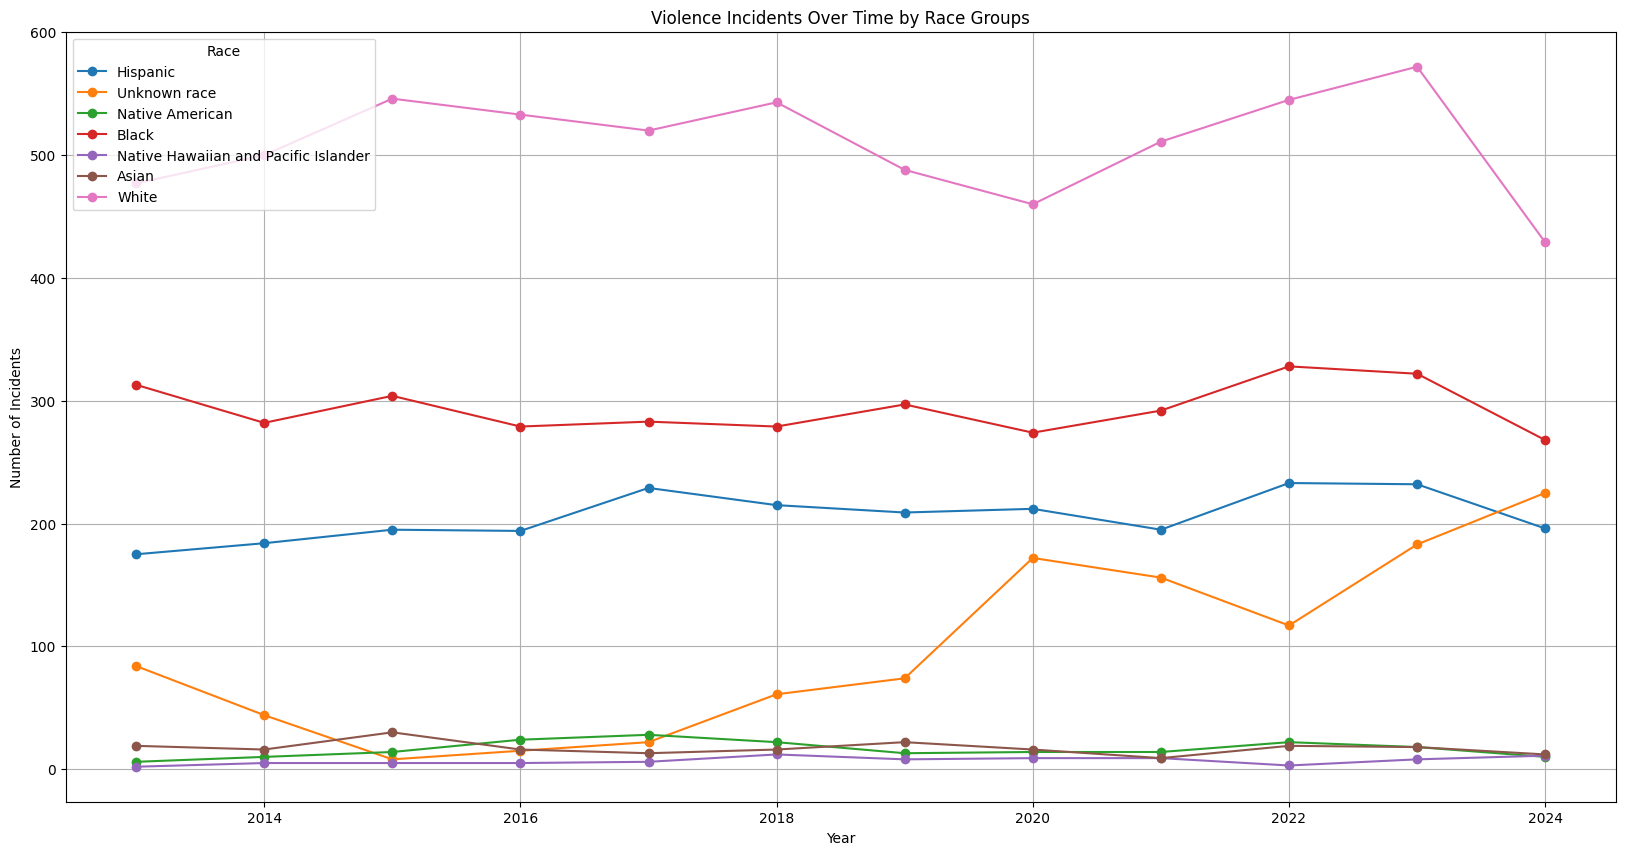

In [7]:
# TODO: Group the data by race and year and count the number of incidents per race per year.
data_grouped = data_cleaned.groupby(['year', 'race']).size().unstack()
# TODO: Plot the violence incidents over time by race groups over years
# Each race group should be a separate line on the plot
plt.figure(figsize=(20, 10))
for race in set(data_cleaned["race"]):
    plt.plot(data_grouped.index, data_grouped[race], label=race, marker='o')

plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Violence Incidents Over Time by Race Groups')
plt.legend(title='Race', loc='upper left')
plt.grid(True)
plt.show()

What are some of your thoughts regarding the number of incident per race and which races have many incidents?  Is this what you expected, given what you know from media and historically?  What seems correct or incorrect about this analysis so far?  If you do see a problem, how would you fix it?

# 3. Correct lense to view the data?

The plot above gives simply the raw number of incidents for each race. Reading the methodology of how the data was created, the dataset includes population size of each county (or rather census tract) and contains information about the percentage of each race group that makes up the population.  Seeing this, a hunch we might have as to why this analysis yields such results is that there may just be many more white people than other races in each census tract; thus, the raw sampling probability of incidents of white people will be more.  Let's check the average population distribution to see if this is indeed true.

In [8]:
# create mapping from particular race to key denoting percentage of people in that census tract
total_pop_key = "pop_total_census_tract"
# race --> census tract dictionary
race2pop_dict = { 
                 'White': "pop_white_census_tract",
                 'Black':"pop_black_census_tract",
                 'Native American':"pop_native_american_census_tract", 
                 'Asian': "pop_asian_census_tract",
                 'Hispanic':"pop_hispanic_census_tract",
                 'Native Hawaiian and Pacific Islander':"pop_pacific_islander_census_tract", 
                 'Unknown race':"pop_other_multiple_census_tract"
                }
# inspect DataFrame to see if there are rows with NaNs (not-a-number) in it
data_cleaned[total_pop_key]

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
          ...  
13754    3305.0
13755    2147.0
13756    5204.0
13757    3657.0
13758    2913.0
Name: pop_total_census_tract, Length: 13759, dtype: float64

We must drop the rows without the total population of the census tract to continue our analysis since we need to compare the population of the races to the total population census tract.

In [9]:
# TODO: Drop rows with NaN in 'pop_total_census_tract'
data_cleaned.dropna(subset=[total_pop_key], inplace=True)
# inspect data format for each race
data_cleaned[race2pop_dict['Black']] # in terms of percentages, need to convert

/var/folders/0l/p7x7d7755vq4wc8qty73kcy40000gn/T/ipykernel_74954/590837705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.dropna(subset=[total_pop_key], inplace=True)


448      24%
449       5%
450       4%
453       5%
454       9%
        ... 
13754     0%
13755    59%
13756     1%
13757    22%
13758     0%
Name: pop_black_census_tract, Length: 12711, dtype: object

Can you explain why the percentages need to be converted to floats?

In [10]:
# TODO: create a function that transforms string percentage data type to float
def percent2float(df_col):
    return df_col.str.rstrip('%').astype('float')/100
    
percent2float(data_cleaned[race2pop_dict['Black']]) # note: function should not normalize

448      0.24
449      0.05
450      0.04
453      0.05
454      0.09
         ... 
13754    0.00
13755    0.59
13756    0.01
13757    0.22
13758    0.00
Name: pop_black_census_tract, Length: 12711, dtype: float64

Now we can plot the average percentage of each race group, where the average percentage is corresponding to each incident's census tract info.

([<matplotlib.patches.Wedge at 0x136c4c590>,
 [Text(-0.08886825606175067, 1.096404320068351, 'White'),
  Text(-0.8540070848725062, -0.6933050547829319, 'Black'),
  Text(-0.3560839854363021, -1.0407709619872183, 'Native American'),
  Text(-0.182695561794734, -1.084722237119027, 'Asian'),
  Text(0.6762029841587058, -0.8676113900905528, 'Hispanic'),
  Text(1.0787485535675618, -0.2151779686117827, 'Native Hawaiian and Pacific Islander'),
  Text(1.0950289207525585, -0.10445890443369242, 'Unknown race')])

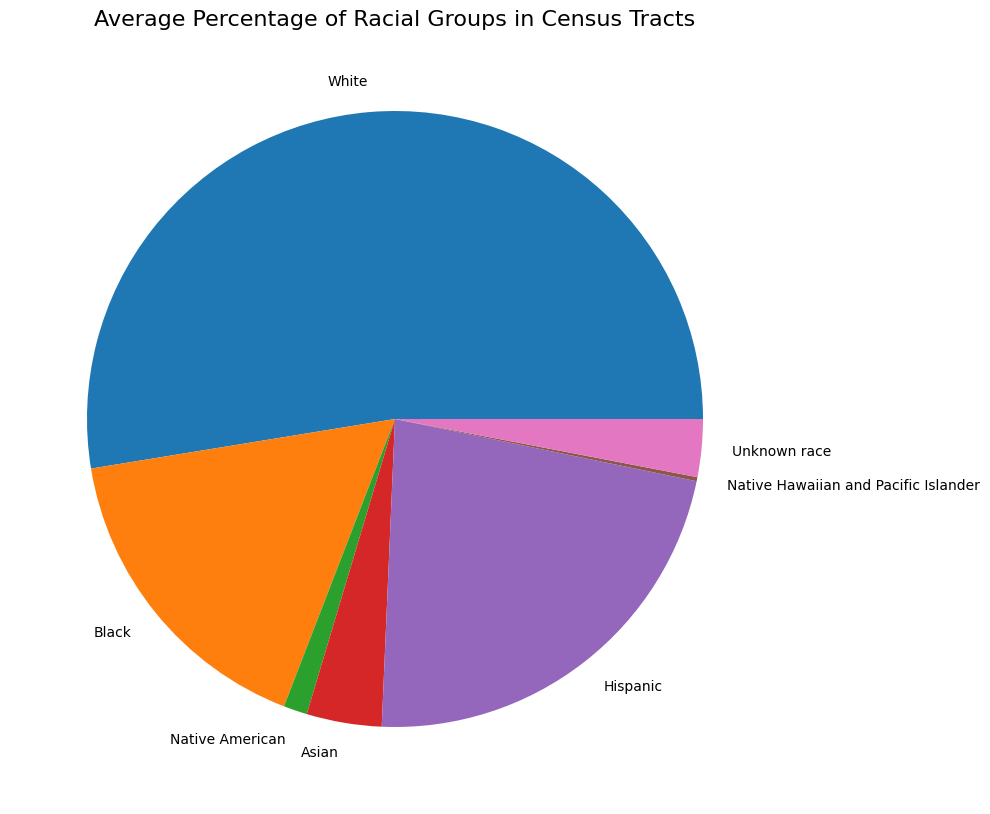

In [11]:
# TODO: Calculate average percentage for each race group as a dictionary called avg_percentages
avg_percentages = {}
for key in race2pop_dict:
    avg_percentages[key] = percent2float(data_cleaned[race2pop_dict[key]]).mean()

# TODO: Extract keys and values from the dictionary (call them race_labels and avg_values)
race_labels = list(avg_percentages.keys())
avg_values = list(avg_percentages.values())

# TODO:  Plot a bar chart that shows average percentage of racial groups in census tracts
plt.figure(figsize=(20, 10))
plt.title('Average Percentage of Racial Groups in Census Tracts', fontsize=16)
plt.pie(avg_values, labels=race_labels)

What do you see?

## Fixing view of data with population normalization

Our suspicion was confirmed since the percentage of white people in the population eclipses the other race groups. To remedy this problem and plot a true representation of the incidents, we consider the "killing rate" for each race group.  In particular, for each race group, we will consider the number of incidents per total number of people of that race group in the particular census tract where the incident occured.

$$ \text{killing rate}(\text{race}) = \frac{ \sum \text{incidents of race} }{ \sum \text{population of race where incidents for race occured} } $$

Once we have the killing rate formula, we can compute the killing rate per 1 million people and make a similar plot as above.

In [12]:
# TODO: group the data by 'state', 'race', and 'year' to easily calculate killing rates (call this race_monthly_data)
race_monthly_data = data_cleaned.groupby(["state", "race", "year"]).size().unstack()

# TODO: Define a function to calculate killing rates
def calculate_killing_rate(group):
    # Get the race name from the first row of the group
    race = group['race'].iloc[0]
    num_incidents = group.shape[0]
    pop_column = race2pop_dict.get(race)
    # Convert the population column to float (if stored as percentages, they should be converted beforehand)
    total_population = percent2float(group[pop_column]).sum()
    race_population = (percent2float(group[pop_column]) / 100 * group[total_pop_key]).sum()
    return pd.Series({'num_incidents': num_incidents, 'total_population': race_population})


# apply the function to get the killing rates
race_monthly_data = data_cleaned.groupby(["state", "race", "year"]).apply(calculate_killing_rate).reset_index()

/var/folders/0l/p7x7d7755vq4wc8qty73kcy40000gn/T/ipykernel_74954/872367229.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  race_monthly_data = data_cleaned.groupby(["state", "race", "year"]).apply(calculate_killing_rate).reset_index()


Next we generate a function that plots the data for multiple races and either the entire USA or specific states.  This should give an idea of the true number of incidents when normalized by race population.

In [13]:
race_monthly_data

,state,race,year,num_incidents,total_population
0,AK,Black,2014,1.0,1.0052
1,AK,Black,2017,2.0,9.2093
2,AK,Black,2018,1.0,0.0000
3,AK,Black,2019,1.0,1.6800
4,AK,Black,2023,1.0,1.3080
...,...,...,...,...,...
1878,WY,White,2020,3.0,82.5567
1879,WY,White,2021,3.0,98.8412
1880,WY,White,2022,5.0,220.4928
1881,WY,White,2023,1.0,24.2424


In [14]:
def plot_killing_rate(race_monthly_data, state='USA', races=['Black', 'White', 'Hispanic', 'Asian']):
    if state == 'USA':
        # Aggregate across states for each race and year
        agg_data = race_monthly_data.groupby(['race', 'year'], as_index=False).agg({
            'num_incidents': 'sum',
            'total_population': 'sum'
        })
    else:
        # Filter data for the specified state
        agg_data = race_monthly_data[race_monthly_data['state'] == state]
        
    plt.figure(figsize=(12, 6))
    
    for race in races:
        # Filter data for the race
        filtered_data = agg_data[agg_data['race'] == race].sort_values(by='year')
        # Compute killing rate: per 1 million people
        filtered_data['killing_rate'] = (filtered_data['num_incidents'] / filtered_data['total_population']) * 1e6
        plt.plot(filtered_data['year'], filtered_data['killing_rate'], 
                 marker='o', label=f"{race} ({state})")
    
    plt.title(f"Killing Rates in {state}", fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel("Killing Rate (per Million People)", fontsize=12)
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()


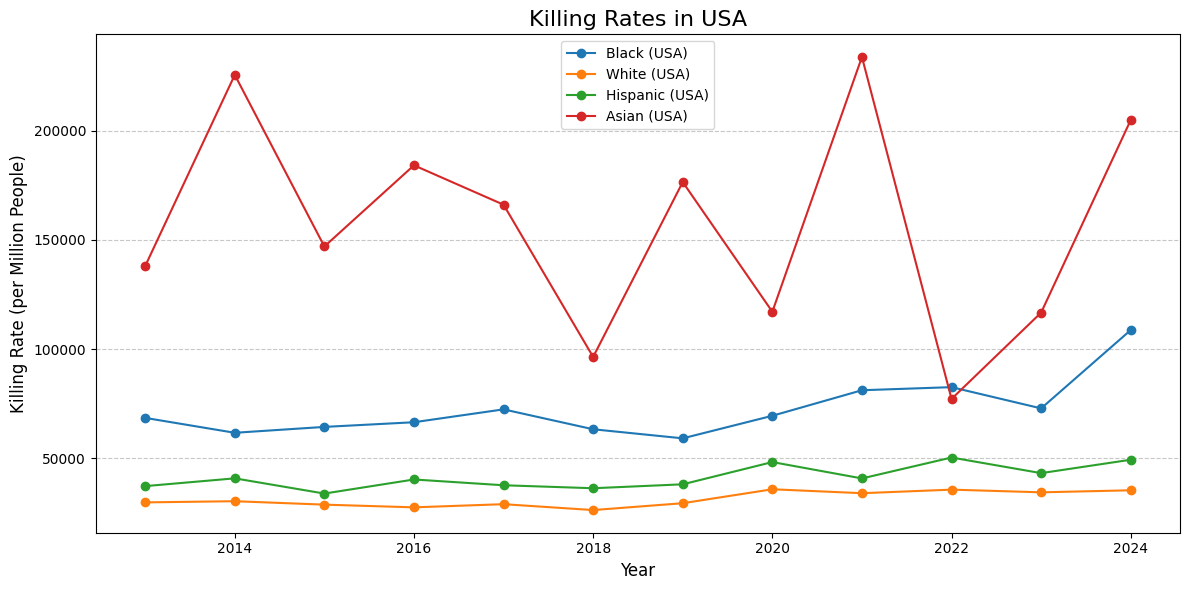

In [15]:
# Inspect the killing rates for the following races and across the USA
races = ['Black', 'White', 'Hispanic', 'Asian'] # list of races
state = 'USA' # Replace with desired state
plot_killing_rate(race_monthly_data, state='USA', races=races)

What do you notice about the killing rates?  Do you see one race with extremely high killing rates?  Why does this happen?

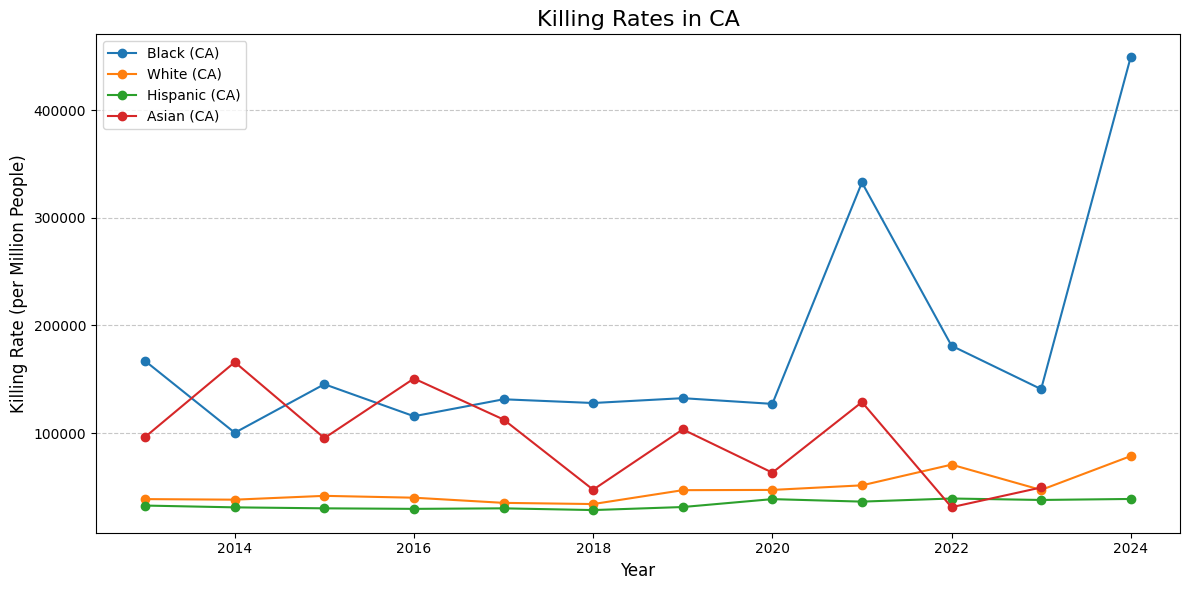

In [16]:
# Inspect the killing rates for the following races and across the state of your choosing
plot_killing_rate(race_monthly_data, state='CA', races=['Black', 'White', 'Hispanic', 'Asian'])

What do you notice about the killing rates for your particular chosen state?  What does this tell you about the demographics and incidents in the chosen state?

## Killing Rate Ratios: Normalized Killing Rates

To view the killing rates in a normalized manner, we can consider a race's killing rate against the killing rate of white people.  This will give a view of the killing rate of the race against white people for perspective.  To do this, you simply need to divide the killing rate of a race with the killing rate of white people.

In [17]:
def plot_killing_rate_ratios(race_monthly_data, state='USA', races=['Black', 'White', 'Hispanic', 'Asian']):
    if state == 'USA':
        agg_data = race_monthly_data.groupby(['race', 'year'], as_index=False).agg({
            'num_incidents': 'sum',
            'total_population': 'sum'
        })
    else:
        agg_data = race_monthly_data[race_monthly_data['state'] == state]
    
    rate_list = []
    # Compute killing rates for each race per year and append to the list
    for race in races:
        race_data = agg_data[agg_data['race'] == race].sort_values(by='year')
        race_data['killing_rate'] = (race_data['num_incidents'] / race_data['total_population']) * 1e6
        race_data = race_data[['year', 'killing_rate']].set_index('year')
        race_data.columns = [race]
        rate_list.append(race_data)
        # race_killing_rates.append(race_data["killing_rate"])
        
    # Combine all dataframes on year
    killing_rate_df = pd.concat(rate_list, axis=1)

    # Normalize by the killing rate for White victims
    normalized_kill_rate_df = killing_rate_df.divide(killing_rate_df['White'], axis=0)
    
    df = normalized_kill_rate_df.reset_index()
    
    plt.figure(figsize=(12, 6))
    for race in races:
        if race in df.columns:
            plt.plot(df['year'], df[race], marker='o', label=f"{race} ({state})")
    
    plt.title(f"Yearly Normalized Killing Rate Ratios in {state}", fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel("Killing Rate Ratio (vs. White)", fontsize=12)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

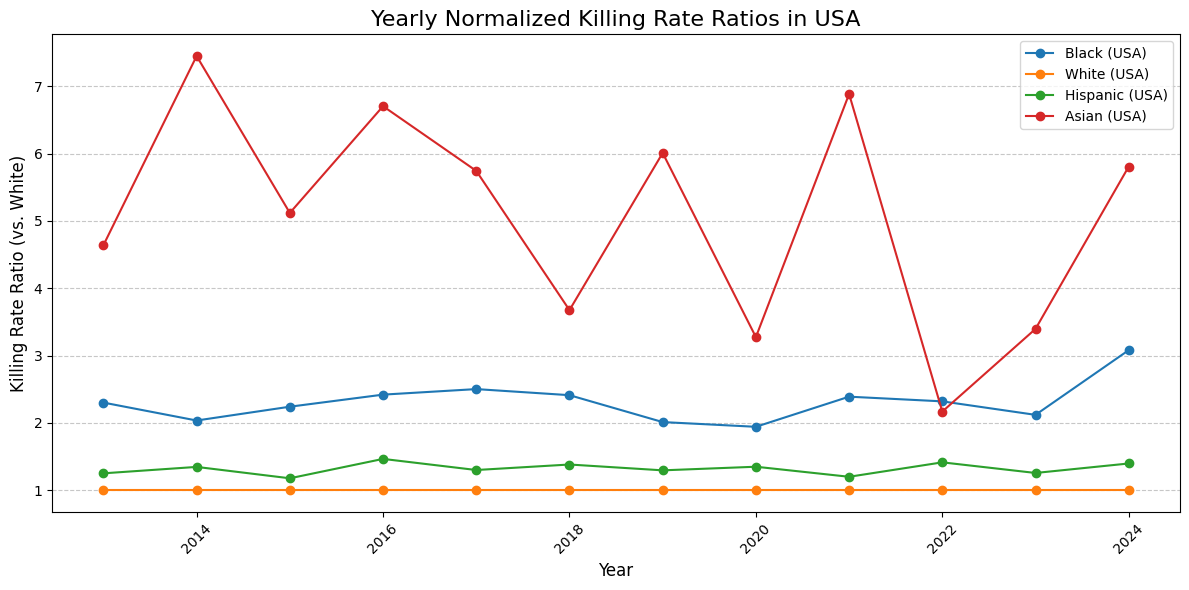

In [18]:
# plot the killing rate ratios of the following races across the USA
plot_killing_rate_ratios(race_monthly_data, state='USA', races = ['Black', 'White', 'Hispanic', 'Asian'])

Why are the killing rates and killing rate ratios important?  What may be incorrect about using killing rates?  What can you do to understand race better in this context?  Plot the killing rate ratios of a particular chosen state and discuss the findings.

# 4. Create animation for incidents by month

So far, we can see how the number of incidents for different races in different states looks, but we may want to see visually how incidents occur in the US regionally. To this end, we want to generate an animation for incidents on the map of the US and then analyze. Here we can use plotly to help generate an html page where you can view the incidents.

Choropleth maps are a type of thematic map where areas are shaded or patterned in proportion to the value of a variable. These maps are particularly useful for visualizing geographic data, such as population density, economic metrics, or in this case, police violence incidents normalized by population.

Try to use choropleth maps to generate a US map animation that shows the number of incidents per state per month.

In [19]:
def create_us_map_animation(data, location_col, time_col, value_col, title, output_path, color_scale="Reds"):
    """
    Creates a choropleth map animation for visualizing trends over time in the US.

    Parameters:
    - data (DataFrame): The input data containing columns for location, time, and value.
    - location_col (str): The column name representing the state locations (e.g., 'state').
    - time_col (str): The column name representing the time (e.g., 'month_year').
    - value_col (str): The column name representing the values to visualize (e.g., 'incidents').
    - title (str): Title of the map animation.
    - output_path (str): File path to save the HTML animation.
    - color_scale (str): The color scale to use for the choropleth map.

    Returns:
    - str: The file path of the saved animation.
    """
    # Convert time column to string if not already
    data[time_col] = data[time_col].astype(str)
    
    # Create the map animation using Plotly
    fig = px.choropleth(
        data,
        locations=location_col,
        locationmode="USA-states",
        color=value_col,
        animation_frame=time_col,
        color_continuous_scale=color_scale,
        scope="usa",
        title=title,
        labels={value_col: value_col.capitalize()}
    )
    
    # Customize layout
    fig.update_layout(
        geo=dict(lakecolor="rgb(255, 255, 255)"),
        title_font_size=18,
        coloraxis_colorbar=dict(title=value_col.capitalize()),
    )
    
    # Save the animation as an HTML file
    fig.write_html(output_path)
    return output_path


In [20]:
# Aggregating data for state-wise incidents by month
state_monthly_data = data_cleaned.groupby(['state', 'month']).size().reset_index()
state_monthly_data.columns = ['state', 'month_year', 'incidents']
state_monthly_data['month_year'] = state_monthly_data['month_year'].astype(str)

# Example Usage of the Function
example_output_path = 'us_incidents_map_animation.html'
create_us_map_animation(
    data=state_monthly_data,
    location_col='state',
    time_col='month_year',
    value_col='incidents',
    title="Police Violence Trends Across the USA Over Time",
    output_path=example_output_path
)

example_output_path


'us_incidents_map_animation.html'

Inspect the findings in the html.  What are trends that you see?  Which states seem to be the most incident-prone?  Can you provide an explanation?

# Create animation for state-wise incidents given by race by month

Now, we want to see where most of the incidents for each race occurs.  Please implement a version of the code from before that filters the animation by race.

In [21]:
def create_race_map_animation(race_group, output_path):
    """
    - race_group (string): the race group to plot
    - output_path (string): the file name to output the animation to
    """
    # Preparing data for race-based mapping
    race_state_data = data_cleaned.groupby(['state', 'month', 'race']).size().reset_index()
    race_state_data.columns = ['state', 'month_year', 'race', 'incidents']
    race_state_data['month_year'] = race_state_data['month_year'].astype(str)
    
    # Filter data for the specific race group
    race_filtered_data = race_state_data[race_state_data['race'] == race_group]
    
    # Generate the map animation using the existing create_us_map_animation function
    return create_us_map_animation(
        data=race_filtered_data,
        location_col='state',
        time_col='month_year',
        value_col='incidents',
        title=f"Police Violence Trends for {race_group} Victims Across the USA",
        output_path=output_path
    )

# Example: Create a map for the "Black" racial group
black_map_path = 'black_race_map_animation.html'
black_map_path = create_race_map_animation(race_group='Black', output_path=black_map_path)
print("Race-specific animation saved to:", black_map_path)
    
# Example: Create a map for "Black" racial group
black_map_path = 'black_race_map_animation.html'
black_map_path = create_race_map_animation(race_group='Black', output_path=black_map_path)
black_map_path


Race-specific animation saved to: black_race_map_animation.html


/var/folders/0l/p7x7d7755vq4wc8qty73kcy40000gn/T/ipykernel_74954/3085154795.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/0l/p7x7d7755vq4wc8qty73kcy40000gn/T/ipykernel_74954/3085154795.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'black_race_map_animation.html'

Inspect the findings.  Where are most of the incidents for your chosen race group?

# Animations for gender-based and age-based trends

Similarly, implement an animation that is gender and age-based.

In [22]:
# Function to create gender-based map for one gender
def create_gender_map_animation(gender_group, output_path):
    # Preparing data for gender-based patterns on the map
    gender_state_data = data.groupby(['state', 'month', 'gender']).size().reset_index()
    gender_state_data.columns = ['state', 'month_year', 'gender', 'incidents']
    gender_state_data['month_year'] = gender_state_data['month_year'].astype(str)

    # Filter data for the specific gender group
    gender_filtered_data = gender_state_data[gender_state_data['gender'] == gender_group]
    
    # Generate the map animation
    return create_us_map_animation(
        data=gender_filtered_data,
        location_col='state',
        time_col='month_year',
        value_col='incidents',
        title=f"Police Violence Trends for {gender_group} Victims Across the USA",
        output_path=output_path
    )


# Preparing data for age-based trends on the map
age_state_data = data.groupby(['state', 'month'])['age'].mean().reset_index()
age_state_data.columns = ['state', 'month_year', 'avg_age']
age_state_data['month_year'] = age_state_data['month_year'].astype(str)

# Create a map for average age trends
age_map_path = 'age_trends_map_animation.html'
age_map_path = create_us_map_animation(
    data=age_state_data,
    location_col='state',
    time_col='month_year',
    value_col='avg_age',
    title="Average Age of Police Violence Victims Across the USA",
    output_path=age_map_path,
    color_scale="Blues"
)

# Create a map for "Male" victims
male_map_path = 'male_victims_map_animation.html'
male_map_path = create_gender_map_animation(gender_group='Male', output_path=male_map_path)

(age_map_path, male_map_path)


/var/folders/0l/p7x7d7755vq4wc8qty73kcy40000gn/T/ipykernel_74954/3085154795.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



('age_trends_map_animation.html', 'male_victims_map_animation.html')

Discuss the findings you see.

# Correlation matrices

It could be useful to see how different variables in the data are related to each other.  For this, we can look at correlation matrices.

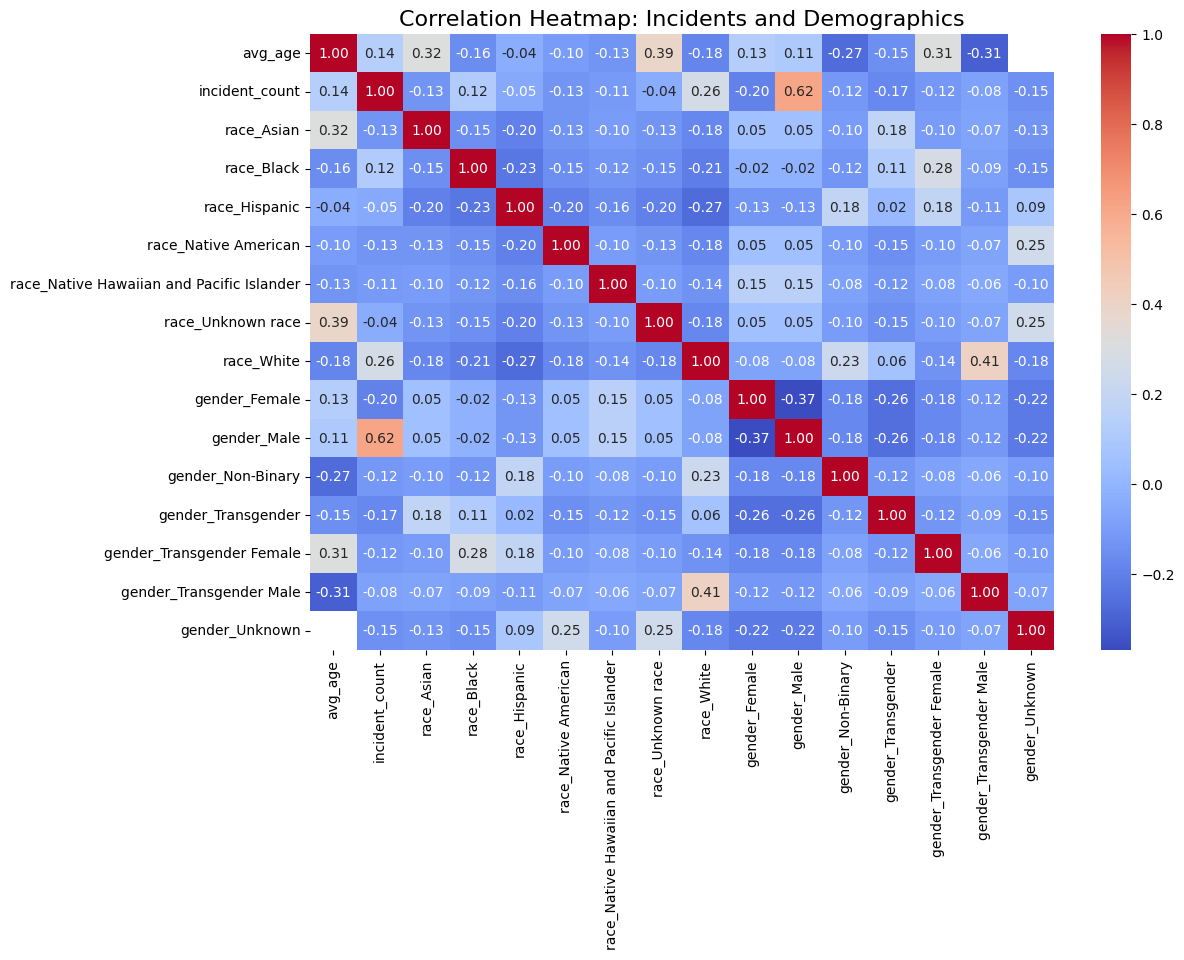

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Preparing data for correlation analysis
# Aggregating incidents by race and gender for correlation with age and population
demographic_agg = data.groupby(['race', 'gender']).agg({
    'age': 'mean',
    'state': 'count'
}).reset_index()

# Renaming columns for clarity
demographic_agg.rename(columns={'state': 'incident_count', 'age': 'avg_age'}, inplace=True)

# Encoding categorical variables for correlation calculation
encoded_data = pd.get_dummies(demographic_agg, columns=['race', 'gender'])

# Calculating correlations
correlation_matrix = encoded_data.corr()

# Plotting the heatmap for correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap: Incidents and Demographics", fontsize=16)
plt.show()


What do you notice about the correlation matrix?

# 5. Summary Statistics

In this section, you will get together with classmates and do some exploratory data analysis to study the police violence dataset more.  You may use a large language model to help you code.  Please explain your steps and discuss your findings.

In [ ]:
# TODO: summary statistics
data_cleaned.describe()

,age,date,tract,hhincome_median_census_tract,latitude,longitude,pop_total_census_tract,year,month
count,12265.000000,12711,12706.000000,12670.000000,12706.000000,12706.000000,12711.000000,12711.000000,12711.000000
mean,37.196005,2018-10-13 15:01:25.815435520,219280.250984,55604.884767,36.587957,-96.435202,4655.024152,2018.292109,6.427582
min,1.000000,2013-01-01 00:00:00,100.000000,0.000000,19.035956,-166.739732,0.000000,2013.000000,1.000000
25%,27.000000,2015-12-21 00:00:00,5400.000000,36988.750000,33.415018,-111.921984,3143.000000,2015.000000,3.000000
50%,35.000000,2018-11-12 00:00:00,30206.000000,50313.000000,36.046863,-93.235413,4350.000000,2018.000000,6.000000
75%,45.000000,2021-08-27 00:00:00,318876.750000,67134.250000,40.040966,-82.776026,5717.000000,2021.000000,9.000000
max,107.000000,2024-07-02 00:00:00,989300.000000,250001.000000,71.301270,-67.260176,61133.000000,2024.000000,12.000000
std,13.201252,NaN,333447.524998,27144.693603,5.349793,16.426298,2403.225516,3.248705,3.457020


Text(0, 0.5, 'Number of Incidents')

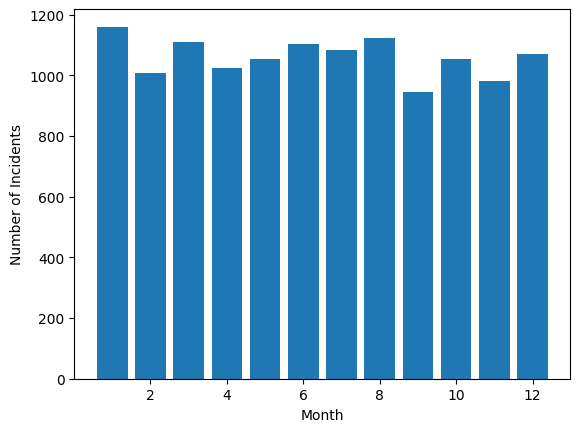

In [29]:
# incidents by month
monthly_incidents = data_cleaned.groupby('month').size()
plt.bar(monthly_incidents.index, monthly_incidents.values)
plt.xlabel('Month')
plt.ylabel('Number of Incidents')

In [ ]:


data_cleaned.columns

Index(['name', 'age', 'gender', 'race', 'date', 'street_address', 'city',
       'state', 'zip', 'county', 'agency_responsible', 'cause_of_death',
       'circumstances', 'disposition_official', 'news_urls',
       'signs_of_mental_illness', 'allegedly_armed', 'wapo_threat_level',
       'encounter_type', 'initial_reason', 'call_for_service', 'tract',
       'hhincome_median_census_tract', 'latitude', 'longitude',
       'pop_total_census_tract', 'pop_white_census_tract',
       'pop_black_census_tract', 'pop_native_american_census_tract',
       'pop_asian_census_tract', 'pop_pacific_islander_census_tract',
       'pop_other_multiple_census_tract', 'pop_hispanic_census_tract', 'year',
       'month'],
      dtype='object')

In [ ]:
# incidents by reason
reason_incidents = data_cleaned.groupby('initial_reason').size()

In [40]:
# categorize reasons into broader categories
keywords = ["drug", "mental", "traffic", "domestic", "warrant", "violence", "weapon", "theft", "other"]
reason_categories = {}
for reason in reason_incidents.index:
    for keyword in keywords:
        if keyword in reason.lower():
            reason_categories[keyword] = reason_categories.get(keyword, 0) + int(reason_incidents[reason])
            break

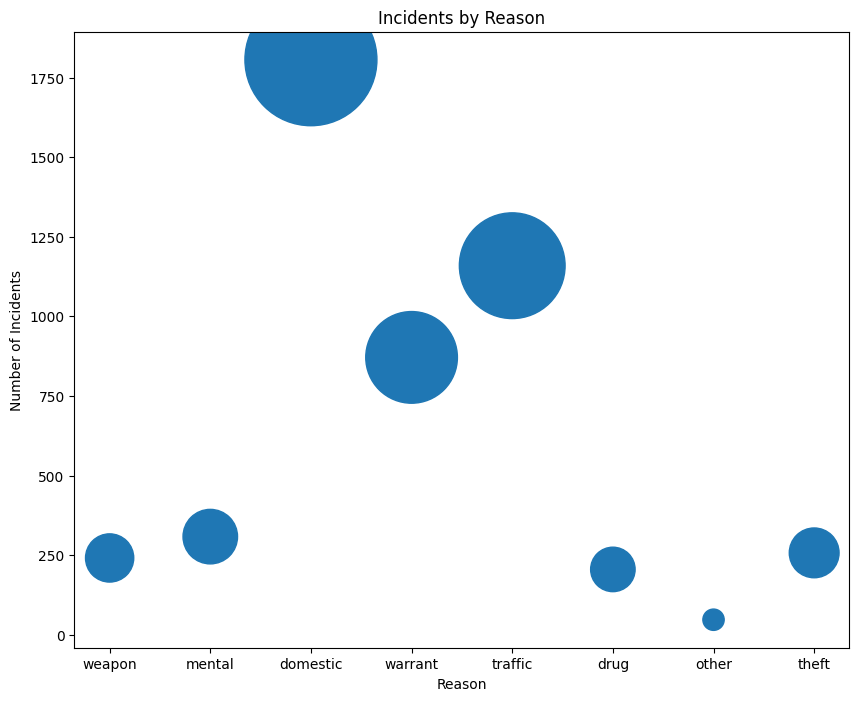

In [44]:
# bubble chart for incidents by reason
plt.figure(figsize=(10, 8))
plt.scatter(reason_categories.keys(), reason_categories.values(), s=np.array(list(reason_categories.values()))*5)
plt.xlabel('Reason')
plt.ylabel('Number of Incidents')
plt.title('Incidents by Reason')
plt.show()